In [1]:
import re
import numpy as np
import math
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline
import sklearn.datasets
from sklearn import preprocessing, model_selection

/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Data

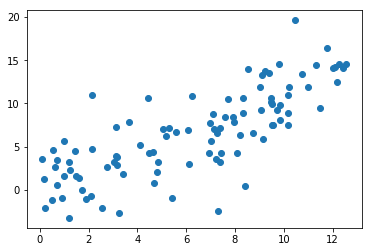

In [2]:
n = 100
X = np.random.uniform(0,4*np.pi, size=(n,1))
y = X + np.random.normal(0,3,size=(n,1))

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.9, random_state=42)

x_val = np.random.uniform(0,4*np.pi, size=(n,1))
y_val = X + np.random.normal(0,3,size=(n,1))

plt.scatter(X, y)

# Optimal Encoding

In [3]:
from networks import MLP
from OptimalEncoding import OptimalEncoding

## Regression

In [4]:
n_in = X.shape[-1]
k = 200
n_out = X.shape[-1]

widths = [3000, 3000, 3000]


In [5]:
encoder = MLP(n_in, k, widths)
decoder = MLP(k, n_out, widths)

In [6]:
oe = OptimalEncoding(encoder, decoder, k)

In [ ]:
oe.train(X_train,x_val=x_val,y_val=y_val, y=y_train, min_entropy=True, epochs=10000, batch_size=10, lr=1e-4, sigma = .01, task = 'autoencoder', heteroskedastic=True, n_samples=10)

 24%|██▎       | 2362/10000 [00:36<01:58, 64.67it/s]

In [ ]:
zhat = oe.encode(X_train)
yhat = oe.decode(zhat)
plt.scatter(X_train, y_train)
plt.scatter(X_train, yhat)

In [ ]:
plt.hist(zhat[:,0])

In [ ]:
zhat = oe.encode(X_test)
yhat = oe.decode(zhat)
plt.scatter(X_test, y_test)
plt.scatter(X_test, yhat)

# SubOptimal Encoding

## Regression

In [ ]:
n_in = X.shape[-1]
k = 300
n_out = X.shape[-1]

widths = [3000, 3000]


In [ ]:
encoder = MLP(n_in, k, widths)
decoder = MLP(k, n_out, widths)

In [ ]:
oe = OptimalEncoding(encoder, decoder, k, activation=None)

In [ ]:
oe.train(X_train,x_val=x_val,y_val=y_val, y=y_train, min_entropy=False, epochs=10000, batch_size=10, lr=1e-4, sigma = 0, task = 'autoencoder', heteroskedastic=False)

In [ ]:
zhat = oe.encode(X_train)
yhat = oe.decode(zhat)
plt.scatter(X_train, y_train)
plt.scatter(X_train, yhat)

In [ ]:
plt.hist(zhat[:,0])

In [ ]:
zhat = oe.encode(X_test)
yhat = oe.decode(zhat)
plt.scatter(X_test, y_test)
plt.scatter(X_test, yhat)